# Isotonic regression

For [classifier calibration](http://fastml.com/classifier-calibration-with-platts-scaling-and-isotonic-regression/)

In [43]:
import numpy as np
%pylab inline

from sklearn.isotonic import IsotonicRegression
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import LSQUnivariateSpline

Populating the interactive namespace from numpy and matplotlib


In [44]:
n = 100
x = np.arange(n)
y = randint(-50, 50, size=(n,)) + 50. * np.log(1 + np.arange(n))

In [109]:
ir = IsotonicRegression()
y_ = ir.fit_transform(x,y)

s = UnivariateSpline(x, y_, s=1)
ys = s(x)

# get knots, but note that the first and last knots may not have 
# a data point after them, and cannot be used as knots in the spline
knots = [knot for knot in s.get_knots()[1:55]]
print knots

lsqs = LSQUnivariateSpline(x, y_, t=knots, k=5)
yls = lsqs(x)

[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 24.0, 25.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 41.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 75.0, 77.0, 78.0, 79.0, 80.0, 81.0, 83.0, 84.0, 87.0, 93.0, 96.0, 98.0]


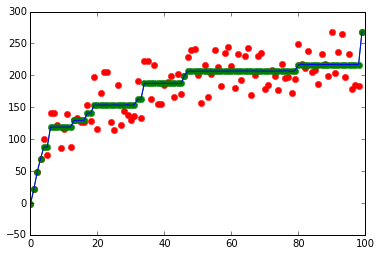

In [108]:
plt.plot(x, y, 'r.', markersize=12)
plt.plot(x, y_, 'g.-', markersize=12)
plt.plot(x, yls, 'b-', markersize=12)

In [20]:
def price_map(min_bid, max_bid, scores):
    m = max_bid - min_bid
    b = min_bid
    return (m*x + b for x in scores)

gen = price_map(0.2, 10, np.arange(0, 1.1, 0.10))
for g in gen:
    print g

0.2
1.18
2.16
3.14
4.12
5.1
6.08
7.06
8.04
9.02
10.0


In [116]:
ir.score(x, y, yls)

0.63988882252185109